# Linear Regression

It is also known as the "line of best fit" and its considered to be as supervised learning. For regression, we are looking at an output (Y), which is a number. Because the output we are looking at is a number, it inherits the name as regression. Its counter part is called "classification". Classification is not looking for an output number, but instead a label.

For example: Prediciting tomorrow's weather yields a number - hence regression. Prediciting that a picture has a cat yields to a label - hence classification.

In general, a simple linear regression will be composed of the following:

- We are given a set of points: { (x1, y1), (x2, y2), ..., (xn, yn) }
- We plot this data into a 2D chart
- We find the line of best fit

## 1 Dimensional Model

We have to remember first that the equation of the line is 
$$y = mx + b$$

where $$m \rightarrow slope$$ and $$y \rightarrow y-intercept $$

or in more general terms

$$\hat y_i = ax_i+b$$

and we make sure that the data "fits" by doing:
$$
y_i \ close \ to \ \hat y_i, \ i=1...N
$$

where $$y_i \rightarrow is \ the \ data \ collected \ from \ an \ experiment$$ and
$$\hat y \rightarrow is \ the \ prediction \ made \ from \ x_i$$

One way of thinking on how to do this is by taking the difference like
$$Error = \sum_{i=1}^{N}(y_i - \hat y_i)$$

But this would yield to an error. For example, if one sample gives us +5 and the other -5, then the sum would be zero! And this is clearly an error.

What we really want is called the "sum of squared errors". In essence, for any target that is not equal to a prediction, we want a positive contribution to the error:
$$Error = \sum_{i=1}^{N}(y_i - \hat y_i)^2$$

And now given this error expression, what we want to do is minimize it. This is where some calculus comes in to play.

Suppose that we have the equation:
$$E = 0.5t^2 -t$$

what we want to do is take the derivative with respect to t, and set that to zero, and solve for t.
$$\frac{\partial E}{\partial t} = t - 1 = 0 \rightarrow t = 1$$

However, we have defined y-hat before, and hence this overall equation can become:
$$Error = \sum_{i=1}^{N}(y_i - (ax_i+b))^2$$

And hence we need to use partial derivatives because E is a function of 2 variables:
$$\frac{\partial E}{\partial a} = \sum_{i=1}^{N}2(y_i - (ax_i + b))(-x_i)$$

And because we want to minize, we set that to zero and try to solve for a:
$$\frac{\partial E}{\partial a} = \sum_{i=1}^{N}2(y_i - (ax_i + b))(-x_i) = 0$$
$$\rightarrow 2\sum_{i=1}^{N}(y_i - (ax_i + b))(-x_i) = 0$$
$$\rightarrow \sum_{i=1}^{N}-(y_ix_i) + \sum_{i=1}^{N} (ax_i^2 + bx_i)) = 0$$
$$\rightarrow -\sum_{i=1}^{N}y_ix_i + a\sum_{i=1}^{N}x_i^2 + b\sum_{i=1}^{N}x_i = 0$$

by re-arranging:
$$a = \frac{\sum_{i=1}^{N}x_iy_i - b\sum_{i=1}^{N}x_i}{\sum_{i=1}^{N}x_i^2}$$

We have found one of two unknowns. Now lets calculate for b:

$$\frac{\partial E}{\partial b} = \sum_{i=1}^{N}2(y_i - (ax_i + b))(-1) = 0$$

$$\rightarrow \sum_{i=1}^{N}ax_i + bN - \sum_{i=1}^{N}y_i = 0$$


$$\rightarrow b = \frac{\sum y_i - a\sum x_i}{N}$$

Because we have the sum of y divided by N, that is the actual definition of the mean. Therefore we have
$$b = \bar y - a\bar x$$

By using the substitution method, then we can conclude that both a and b are:

$$a = \frac{\sum y_ix_i - \bar y\sum x_i}{\sum x_i^2 - \bar x\sum x_i}$$


$$b = \frac{\bar y\sum x_i^2 - \bar x\sum y_ix_i}{\sum x_i^2 - \bar x\sum x_i}$$

Now lets put this theory into code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!curl -O https://ml-journey.s3.amazonaws.com/data_1d.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2770  100  2770    0     0  18481      0 --:--:-- --:--:-- --:--:-- 18843


In [3]:
!head data_1d.csv

95.724162408,197.179636092
35.7576189281,67.5906695414
28.8168474238,60.8541328206
99.9584813087,196.907396981
66.8097483121,125.311128524
58.2156926413,115.785784589
53.8210763379,110.762772705
81.2960821704,157.98528569
80.6486970595,159.61941373
78.2528136925,149.003865539


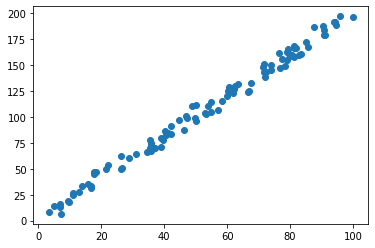

In [4]:
# load data
X = []
Y = []
for line in open('data_1d.csv'):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

# turn them into numpy arrays
X = np.array(X)
Y = np.array(Y)

# plot data
plt.scatter(X, Y)
plt.show()

In [5]:
# apply the equations to calculate a and b

denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

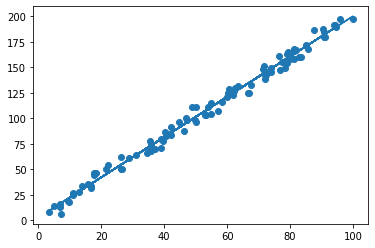

In [6]:
# calculate predicted Y
Yhat = a*X + b
plt.scatter(X,Y)
plt.plot(X, Yhat)
plt.show()

As denoted by the plot, we can confirm that the line goes through all the points.

## R Squared

By using the r-squared method, we determine/measure the effectiveness of our model. This is a numerical measure. It can be used for linear regression, and other types of regression.

The definition of the r-squared is:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where $$SS_{res} \rightarrow is \ the \ square \ error \ from \ before \rightarrow \sum_{i=1}^{N}(y_i - \hat y)^2 $$

and $$SS_{tot} \rightarrow \sum (y_i - \bar y)^2$$

Therefore, say if we had the sum of squares residual (SS res) to be a value close to zero, then we would have:

$$R^2 \simeq 1 - 0 \simeq 1$$

which mean that is a perfect model. 

Say that we also had an r-square = 0, then it means that we just predicted the average of y, and the model is not very good. Usually this is caused when the scatter plot is all over and in essence the line of best fit is the mean of y.

Finally, say that we had an r-squared < 0, the model is definitely not working.

In [7]:
SSres = (Y - Yhat).dot(Y - Yhat)
SStot = (Y - Y.mean()).dot(Y - Y.mean())
r2 = 1 - SSres/SStot
r2

0.9911838202977805

Which tells us that its a pretty good model (of course, based on the plot and line of best fit!)